In [19]:
import sys
import csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
#ucitavanje fajla i prikaz informacija
df = pd.read_csv("train.csv")
#df

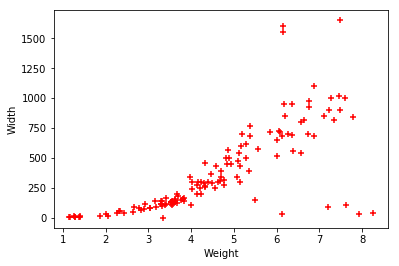

In [21]:
#Iscrtavanje linearne regresije
%matplotlib inline
plt.xlabel('Weight')
plt.ylabel('Width')
plt.scatter(df.Width,df.Weight, color='red', marker='+')

In [22]:
#Normalizacija podataka
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

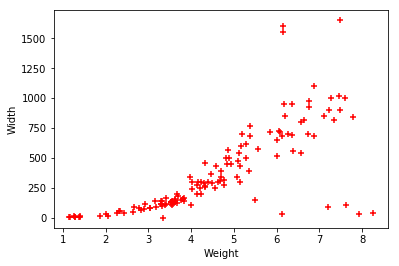

In [23]:
# df = normalize(df)
%matplotlib inline
plt.xlabel('Weight')
plt.ylabel('Width')
plt.scatter(df.Width, df.Weight, color='red', marker='+')

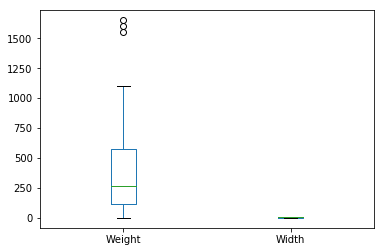

,Weight,Width
count,133.000000,133.000000
mean,372.796241,4.550589
std,350.058069,1.704677
min,0.000000,1.148400
25%,115.000000,3.410400
50%,265.000000,4.335000
75%,575.000000,6.018000
max,1650.000000,8.250000


In [24]:
#Boxplot da se vide outlieri
df.plot(kind='box')
plt.show()

df.describe()

In [25]:
#PRONAZENJE PARAMETARA ZA OUTLIERE
# df.describe()

Q1 = df.describe().loc['25%']
# Q1['Weight']
# Q1['Width']
Q3 = df.describe().loc['75%']

IQR_Weight = Q3["Weight"] - Q1['Weight']
IQR_Width = Q3["Width"] - Q1['Width']

#Racunanje whiskera gore i dole
UP_Weigth = Q3["Weight"] + (1.5 *  IQR_Weight)
DOWN_Weigth = Q1["Weight"] - (1.5 *  IQR_Weight)

UP_Width = Q3["Width"] + (1.5 *  IQR_Width)
DOWN_Width = Q1["Width"] - (1.5 *  IQR_Width)


print("Weight Q1= " + str(Q1['Weight']))
print("Weight Q2= " + str(Q3['Weight']))

print("Width Q1= " + str(Q1['Width']))
print("Width Q1= " + str(Q3['Width']))

print("Weight IQR= " + str(IQR_Weight))
print("Width IQR= " + str(IQR_Width))

print("Weigth UP= " + str(UP_Weigth))
print("Weigth DOWN= " + str(DOWN_Weigth))
print("Width UP= " + str(UP_Width))
print("Width DOWN= " + str(DOWN_Width))

Weight Q1= 115.0
Weight Q2= 575.0
Width Q1= 3.4104
Width Q1= 6.018
Weight IQR= 460.0
Width IQR= 2.6075999999999997
Weigth UP= 1265.0
Weigth DOWN= -575.0
Width UP= 9.9294
Width DOWN= -0.5009999999999994


In [26]:
def takeout_outliers(df, up_w, down_w, up_wi, down_wi):
    indexes = []
    counter = 0

    for i in df.Weight:
        if i > up_w or i < down_w:
            if counter not in indexes:
                indexes.append(counter)
        counter += 1

    couter = 0
    for i in df.Width:
        if i > up_wi or i < down_wi:
            if counter not in indexes:
                indexes.append(counter)
        counter += 1
    

    data = df.drop(labels=indexes, axis=0)
    return data
        

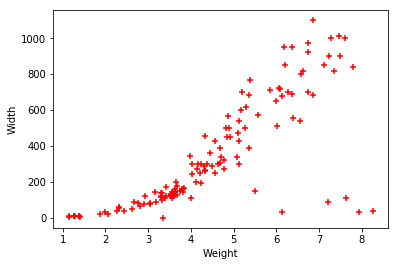

In [27]:
#IZBACIVANJE OUTLIERA
df = takeout_outliers(df,UP_Weigth,DOWN_Weigth,UP_Width,DOWN_Width)

# Wmean = 372.796241
# Wimean = 4.5505
# Wsd = 350.058
# Wisd = 1.704677

# w_upper = Wmean +  Wsd
# w_lower = Wmean -  Wsd
# wi_upper = Wimean + Wisd
# wi_lower = Wimean -  Wisd


# print(w_upper)
# print(w_lower)
# print(wi_upper)
# print(wi_lower)
# df = takeout_outliers(df,w_upper,w_lower,wi_upper,wi_lower )

%matplotlib inline
plt.xlabel('Weight')
plt.ylabel('Width')
plt.scatter(df.Width,df.Weight, color='red', marker='+')


In [28]:
#Pronalazenje x meana
x_mean = 0
sum_x = 0
for w in df.Weight:
    sum_x += w
    
x_mean = sum_x / df.Weight.size

#Pronalazenje y meana
y_mean = 0
sum_y = 0
for w in df.Width:
    sum_y += w
    
y_mean = sum_y / df.Width.size
print("x_mean = " + str(x_mean))
print("y_mean = " + str(y_mean))


x_mean = 344.4761538461539
y_mean = 4.503541538461536


In [30]:
#Broj elemenata
n = df.Weight.size

#pravljenje x - x_mean liste
x_xmean = []
for x in df.Weight:
    x_xmean.append(x - x_mean)
    
#pravljenje y - y_mean liste
y_ymean = []
for y in df.Width:
    y_ymean.append(y - y_mean)


#racunanje sume od (x - x_mean) * (y - y_mean)
sum_xxmean_yymean = 0
for i in range(len(x_xmean)):
    mult = x_xmean[i] * y_ymean[i]
    sum_xxmean_yymean += mult

print("Suma (x - x_mean) * (y - y_mean) = " + str(sum_xxmean_yymean))
    
    
#racunanje sume (x - x_mean)^2
x_kvad_suma = 0
for x in x_xmean:
    x_kvad_suma += x * x

#racunanje sume (y - y_mean)^2
y_kvad_suma = 0
for y in y_ymean:
    y_kvad_suma += y * y

print("Suma (x - x_mean)^2 = " + str(x_kvad_suma))
print("Suma (y - y_mean)^2 = " + str(y_kvad_suma))

#racunaje vrijednosti r
r = sum_xxmean_yymean / np.sqrt(x_kvad_suma * y_kvad_suma)
print("Vrijednost r = " + str(r))


Sy = np.sqrt(y_kvad_suma/(n-1))
print("Vrijednost Sy = " + str(Sy))

Sx = np.sqrt(x_kvad_suma/(n-1))
print("Vrijednost Sx = " + str(Sx))

b = r * (Sy / Sx)
print("Vrijednost b = " + str(b))

a = y_mean - b * x_mean
print("Vrijednost a = " + str(a))


print("\n Funkcija izgleda ovako: \n y = " + str(a) + " + " + str(b) + " * x")

Suma (x - x_mean) * (y - y_mean) = 50967.14339876922
Suma (x - x_mean)^2 = 11548015.27607692
Suma (y - y_mean)^2 = 369.6346465756924
Vrijednost r = 0.7801000078336259
Vrijednost Sy = 1.6927447702403071
Vrijednost Sx = 299.198092012904
Vrijednost b = 0.004413498092988645
Vrijednost a = 2.983196690381473

 Funkcija izgleda ovako: 
 y = 2.983196690381473 + 0.004413498092988645 * x


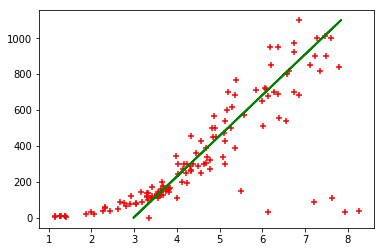

In [31]:
#ISCRTAVANJE LINIJE LINEARNE REGRESIJE
y = []
for x in df.Weight:
    y.append(b * x + a)
    
plt.scatter(df.Width, df.Weight, color='red', marker='+')
plt.plot(y, df.Weight, color='green',linewidth=2, markersize=12)

In [32]:
 def takeout_long_residuals(df, takeout_distance):
    indexes = []
    distances = []
    counter = 0

    for index, row in df.iterrows():
        x2 = row['Weight']
        y2 = row['Width']

        c = y2 + b * x2
        x1 = (c - a)/ (2* b)
        y1 = b * x1 + a
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if dist > takeout_distance:
            distances.append(dist)
            indexes.append(index)

    data = df.drop(labels=indexes, axis=0)
    return data

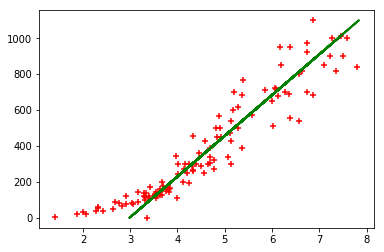

In [33]:
df = takeout_long_residuals(df, 185)
#distances
#df


y = []
for x in df.Weight:
    y.append(a + b * x)
    
plt.scatter(df.Width, df.Weight, color='red', marker='+')
plt.plot(y, df.Weight, color='green',linewidth=2, markersize=12)

In [34]:
#Racunanje RMSE
def RMSE(n,predicted, acctual):
    suma = 0
    for i in range(0, n):
        suma += (predicted[i] - acctual.iloc[i])**2
    return np.sqrt(suma/n)
        

In [35]:
n = df.Weight.size
RMSE(n, y, df.Weight)

475.26559454966275